In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
dataset=pd.read_csv('housing.csv')

In [4]:
#split x and y
x = dataset.drop('PRICE', axis = 1)
y = dataset['PRICE']

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 17)

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
regressor = RandomForestRegressor()

In [9]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [10]:
grid = GridSearchCV(regressor, parametrs, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [11]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 20}

In [12]:
# Fitting Random Forest Regression to the Training set
#from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)

In [13]:
#regressor.fit(X_train, y_train)

In [14]:
# Predicting the Test set results
y_pred = grid.predict(X_test)

In [15]:
# Predicting the Test set results
#y_pred = regressor.predict(X_test)

In [16]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9705159193189519
Mean Squared Error: 9.53628999340673
Root Mean Squared Error: 3.0880884044027512


In [17]:
import matplotlib.pyplot as plt

[30.5 22.  17.7 50.  23.3 19.9 37.6 23.3  8.8 32.5 20.  20.5 22.7 13.4
 20.9 20.3 23.4 10.9 18.9 18.2 28.2 23.6 17.4 16.7 24.6 39.8 14.9  9.7
 17.8 23.9 28.1 17.1 22.2 21.7 24.1 14.4 30.1  8.3 20.4 38.7  8.7 20.1
 36.2 22.9 19.2 13.5 33.2 22.  21.  12.6 23.9 16.1 28.4 25.  18.5 15.6
 22.5 23.2 43.1 23.9 23.  23.2 18.9 23.  13.4 24.2 24.4 29.8 31.6 20.6
 37.  19.6 24.5 36.  11.8 24.1 25.3 30.1 50.  23.1 13.4 37.9 19.7 23.7
 25.  20.6 20.4 13.8 20.7  7.4 21.7 13.  17.5 27.9 21.9 19.6 18.6 18.9
 13.6 20.5 17.4 22.3  8.8 50.  36.1 14.6 41.7 32.2 19.4 20.8 24.8 20.6
 15.4 13.9 18.7 28.  20.5 23.9 13.8 17.  11.8 32.4 23.1 43.5 19.5 45.4
 21.4]
[29.84259921 22.23723333 19.42556548 44.84344444 26.25033292 20.20097134
 46.40725    22.95755583  9.80628571 29.84414394 18.70701075 21.66414678
 20.27785718 15.61048376 19.79334885 21.25371894 21.98929719 17.39714285
 18.69833618 18.90295927 29.02470779 22.94046855 15.99176465 14.83369546
 24.64679067 43.86758333 15.57657189 11.12649621 18.90430702 2

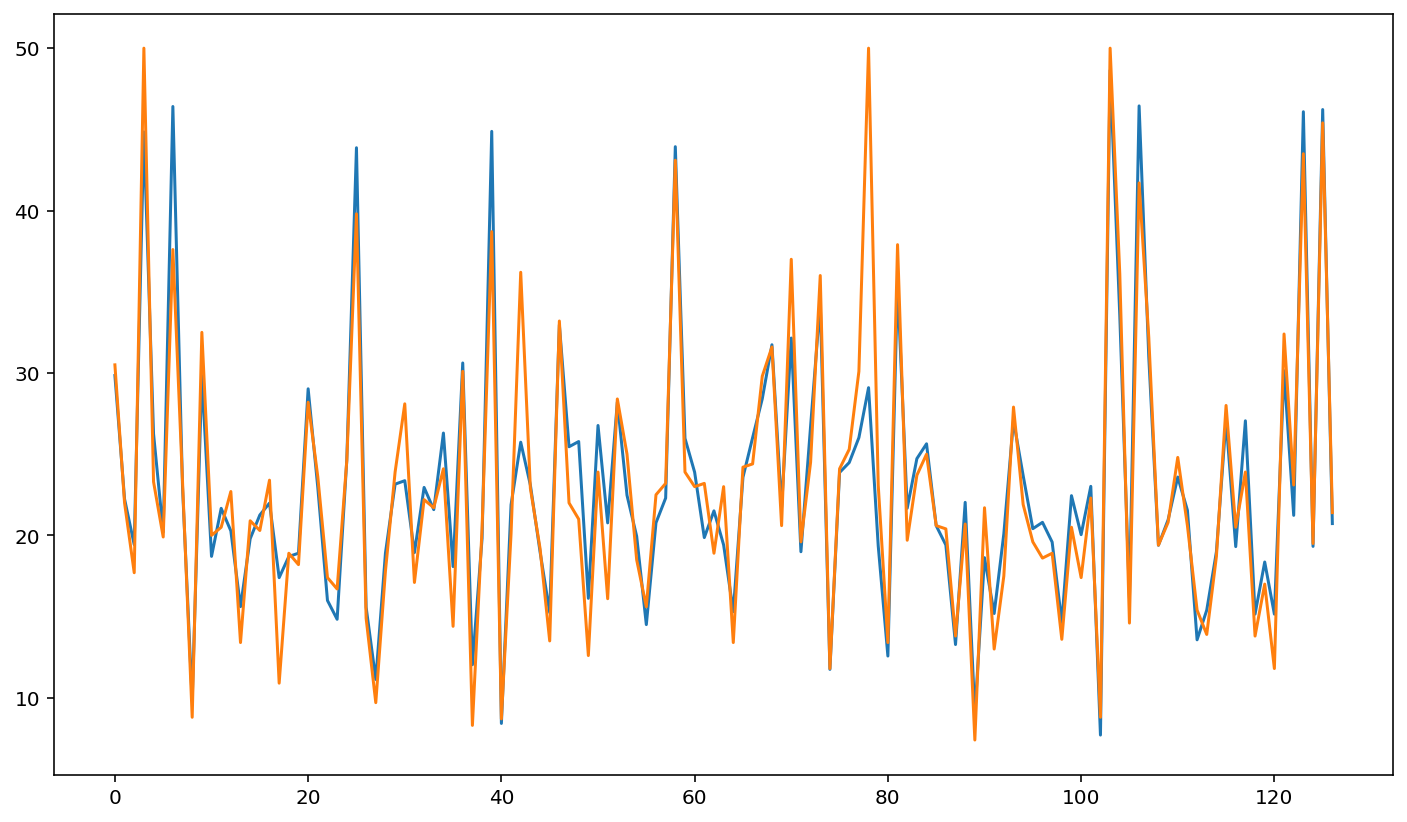

In [18]:
y_test = np.array(y_test)
print(y_test)
print(y_pred)
plt.plot(y_pred)
plt.plot(y_test)

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test, y_pred)

0.8770225793496699